# Import

In [3]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 16.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

ModuleNotFoundError: No module named 'mendeleev'


# Function that sets up HNC QSP 

## Load TCCW Cases

In [6]:
ni_cc = 0.99961457e22
Te_eV = 1
Ti_eV = 1
Z, A = 5, 1

plasma = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                     βu_options = {'add_bridge':True, 'pseudopotential':False}, 
                     qsp_options= {'r_c':0.0},
                     hnc_options= {'kappa_multiscale':10, 'R_max':10,'N_bins':10000},
                     hnc_solve_options={'alpha_Picard':1,'iters_to_wait':30,'verbose':True,'iters_to_use':5})
print(plasma.qsp.Γ_matrix)
plasma.run_onlyion_hnc()


Te_in_eV: 1.000
Ti_in_eV: 1.000
[[125.00000001  -5.4594738 ]
 [ -5.4594738    1.09142943]]
0: Initial condition Total Error: 3.994e+01
1: Change in c_r: 2.196e-01, HNC Error: 4.409e-01, Total Error: 1.591e+01
2: Change in c_r: 2.251e-01, HNC Error: 3.049e+02, Total Error: 9.504e+00
3: Change in c_r: 2.723e-01, HNC Error: 2.301e-01, Total Error: 6.444e+00
4: Change in c_r: 1.948e-01, HNC Error: 4.325e+02, Total Error: 5.760e+00
5: Change in c_r: 2.939e-01, HNC Error: 1.980e-01, Total Error: 3.967e+00
6: Change in c_r: 1.685e-01, HNC Error: 2.099e+01, Total Error: 4.335e+00
7: Change in c_r: 2.593e-01, HNC Error: 2.660e-01, Total Error: 2.849e+00
8: Change in c_r: 1.710e-01, HNC Error: 1.740e+00, Total Error: 3.095e+00
9: Change in c_r: 2.225e-01, HNC Error: 2.092e-01, Total Error: 2.225e+00
10: Change in c_r: 1.787e-01, HNC Error: 2.621e-01, Total Error: 2.266e+00
11: Change in c_r: 1.912e-01, HNC Error: 1.326e-01, Total Error: 1.841e+00
12: Change in c_r: 1.795e-01, HNC Error: 1.109e-0

/home/zach/plasma/hnc/hnc/hnc.py:617: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.βu_r_matrix + self.h_r_matrix - self.c_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)


32: Change in c_r: 4.290e-02, HNC Error: inf, Total Error: 1.458e+06
|d_n|^2 =  [121889.79781714818, 49.18348380916119, 9.755950789597152, 10.146041475935677, 10.54774025072078]
 αs:  [-6.2500000e-02 -3.1250000e-02  1.4075000e+02 -2.5268750e+02
  1.1303125e+02]
33: Change in c_r: 7.626e+01, HNC Error: inf, Total Error: 2.234e+55
|d_n|^2 =  [1247085.0534002692, 121889.79781714818, 49.18348380916119, 9.755950789597152, 10.146041475935677]
 αs:  [ 1.98975205e-03 -1.97449327e-03 -9.57183838e-02  2.36894531e+01
 -2.25937500e+01]
34: Change in c_r: 9.568e+01, HNC Error: inf, Total Error: 7.326e+02
|d_n|^2 =  [2358.4784758123387, 1247085.0534002692, 121889.79781714818, 49.18348380916119, 9.755950789597152]
 αs:  [-4.92496761e-03 -1.93668296e-07 -5.12267332e-05  2.23650702e-01
  7.81325686e-01]
35: Change in c_r: 2.339e+01, HNC Error: 1.104e-01, Total Error: 5.370e-01
|d_n|^2 =  [14.474225618853554, 2358.4784758123387, 1247085.0534002692, 121889.79781714818, 49.18348380916119]
 αs:  [ 7.615848

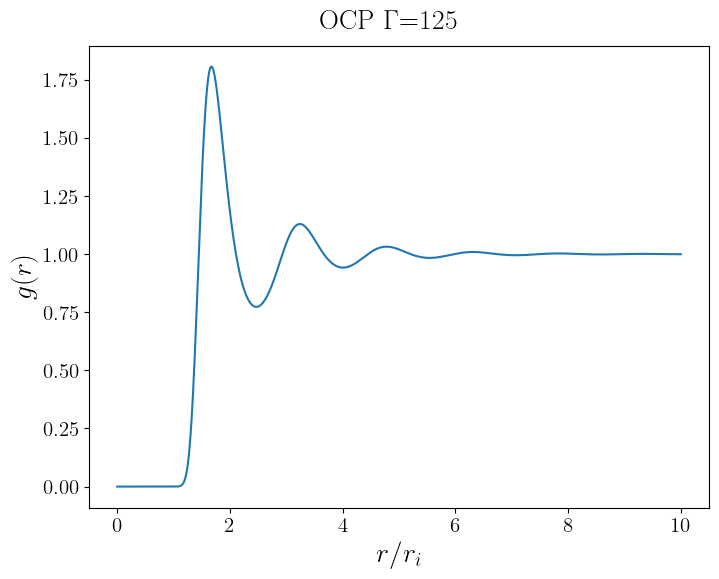

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle(r"OCP $\Gamma$=125", fontsize=20, y=0.94)

ax.plot(plasma.hnc.r_array, plasma.onlyion_hnc.h_r_matrix[0,0]+1)

ax.set_ylabel(r"$g(r)$", fontsize=20)
ax.set_xlabel(r"$r/r_i$", fontsize=20)
ax.tick_params(labelsize=15)
plt.savefig("OCP_gofr.png", dpi=400)

### Fitting to c_k

In [19]:
from scipy.optimize import curve_fit

In [318]:
def c_k_kinf(k, A, α, β, b):
    return A/k * np.exp(-α*k)*np.sin(β*k + b)

# def c_k_kinf(k, A1, α1, β1, b1, A2, α2, β2, b2, P1):
#     return A1/k**P1 * np.exp(-α1*k)*np.sin(β1*k + b1) + A2/k * np.exp(-α2*k)*np.cos(β2*k + b2)

# def c_k_kinf(k, A1, α1, β1, b1,c, d):
#     return A1/k * np.exp(-α1*k)*np.sin(β1*(1+c*k + d*k**2)*k + b1)

def c_k_k0(k, A, α, β, b):
    # return A/k * np.exp(-α*k)*np.sin(β*k + b)
    return A/(k**2 + α)

def c_k_kall(k, A, α, β, b, A2, α2, β2, b2):
    return (A/k) * np.exp(-α*k )*np.sin(β*k + b) + (A2/k) * np.exp(-α2*k )*np.sin(β2*k + b2)


k0_fit, _ = curve_fit(c_k_k0, k_array, hnc.c_k_matrix[0,0], p0=[5,0.3,2,-0.7])
c_k_k0_fit = c_k_k0(k_array, *k0_fit)
print("k->0 Fit: ", *k0_fit)
mid1, mid2, mid3, mid4 = 15, 40, 60, 80

kmid_fit, _ = curve_fit(c_k_k0, k_array[mid1:mid2], hnc.c_k_matrix[0,0][mid1:mid2], p0=[5,0.3,2,-0.7])
c_k_kmid_fit = c_k_k0(k_array, *kmid_fit)
print("k->mid1 Fit: ", *kmid_fit)

kmid2_fit, _ = curve_fit(c_k_k0, k_array[mid2:mid3], hnc.c_k_matrix[0,0][mid2:mid3], p0=[5,0.3,2,-0.7])
c_k_kmid2_fit = c_k_k0(k_array, *kmid2_fit)
print("k->mid2 Fit: ", *kmid2_fit)

kmid3_fit, _ = curve_fit(c_k_k0, k_array[mid3:mid4], hnc.c_k_matrix[0,0][mid3:mid4], p0=[5,0.3,2,-0.7])
c_k_kmid3_fit = c_k_k0(k_array, *kmid3_fit)
print("k->mid2 Fit: ", *kmid3_fit)

kinf_fit, _ = curve_fit(c_k_kinf, k_array[mid2:], hnc.c_k_matrix[0,0][mid2:], p0=[5,0.3,2,-0.7], maxfev=10000)
c_k_kinf_fit = c_k_kinf(k_array, *kinf_fit)
print("k->Infinity Fit: ", *kinf_fit)


# kall_fit, _ = curve_fit(c_k_kall, k_array, hnc.c_k_matrix[0,0], p0=[5,0.3,2,-0.7]*2)
# c_k_kall_fit = c_k_kall(k_array, *kall_fit)
# print("k->all Fit: ", *kall_fit)

k->0 Fit:  -286.64379078592856 0.569489024712931 2.0 -0.7
k->mid1 Fit:  -0.31265434267969333 -40.7239501801958 2.0 -0.7
k->mid2 Fit:  0.23421139159049667 -56.852209637175406 2.0 -0.7
k->mid2 Fit:  0.013232134004943198 -331.8296333357045 2.0 -0.7
k->Infinity Fit:  67.67515861052814 0.453330746509095 1.1580602251101673 10.0232477930264


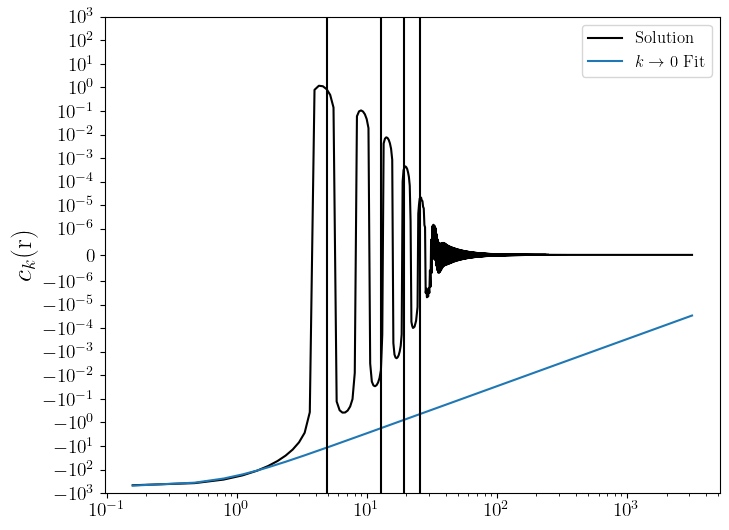

In [319]:
fig, axs = plt.subplots(1,1, figsize=(8,6))
axs = np.array([axs])

k_array = plasma.hnc.k_array
hnc = plasma.onlyion_hnc

#Plots
c_k_piecwise = np.where(k_array<k_array[mid1], c_k_k0_fit, c_k_kmid_fit )
c_k_piecwise = np.where(k_array[mid2]>k_array, c_k_piecwise, c_k_kmid2_fit )
c_k_piecwise = np.where(k_array[mid3]>k_array, c_k_piecwise, c_k_kmid3_fit )
c_k_piecwise = np.where(k_array[mid4]>k_array, c_k_piecwise, c_k_kinf_fit )

axs[0].plot(k_array, hnc.c_k_matrix[0,0],'k-', label="Solution")
# axs[0].plot(k_array, c_k_piecwise, label=r"$k\to0$ Fit")
axs[0].plot(k_array, c_k_k0_fit, label=r"$k\to0$ Fit")
# axs[0].plot(k_array, c_k_kmid_fit, label=r"$k\to$ mid Fit")
# axs[0].plot(k_array, c_k_kinf_fit, label=r"$k\to\infty$ Fit")
γ=0.01
# axs[0].plot(k_array, c_k_kall(k_array,  829.7, 1.1, 0.84/γ, -3.2,γ), label=r"$k$ All Fit")
# axs[0].plot(k_array, c_k_kall(k_array, *kall_fit), label=r"$k$ All Fit")
# axs[0].plot(k_array, c_k_kinf(k_array, 5, 0.3,2,-0.7), label=r"$k\to\infty$ Fit")

# Plot Configuration
axs[0].set_ylim(-1e3,1e3)
axs[0].set_ylabel(r'$c_k$(r)', fontsize=20)

for ax in axs:
    ax.set_xlim(np.min(k_array),60)
    # ax.set_xlim(3,40)
    ax.set_xscale('log')
    ax.legend(fontsize=12, loc='upper right')
    ax.tick_params(labelsize=14)

plt.vlines(k_array[mid1],-1e6,1e6, 'k')
plt.vlines(k_array[mid2],-1e6,1e6, 'k')
plt.vlines(k_array[mid3],-1e6,1e6, 'k')
plt.vlines(k_array[mid4],-1e6,1e6, 'k')

axs[0].set_yscale('symlog',linthresh=1e-6) 
plt.tight_layout()

### Fitting to h_r

In [367]:
def h_r_rinf(r, A, α, β, b):
    return A/r * np.exp(-α*r)*np.sin(β*r + b)

def βω_r0(r, Γ, α, β, γ, δ):
    return Γ/r + α + β*r + γ*r**2 + δ*r**3
# def h_r_r0(r, κ, α, b):
#     return np.exp(-κ/r + α*r + b)-1
#     return np.exp(   np.exp(α*(r -b))-1  )-1

@np.vectorize
def h_r_rall(r, A, κ, k, b, Γ, α, β, γ, δ, r_root):
#     n=2
#     r_root = (n*π-b)/β
    if r<r_root:
        return np.exp(- (Γ/r + α + β*r + γ*r**2 + δ*r**3))-1
    else: 
        return A/r * np.exp(-κ*r)*np.sin(k*r+b )


@np.vectorize
def h_r_rsin(r, A, α, β, b, B, κ):
    n=2
    r_root = (n*π-b)/β
    if r<r_root:
        return np.exp(β*(r-r_root))-1
    else: 
        return np.sin(β*r+b )
# @np.vectorize
# def h_r_rall(r, r_0, A, α, β, b, B, κ):
#     if r>r_0:
#         return h_r_rinf(r,A,α,β,b)
#     else:
#         return h_r_r0(r,B,κ)-1
    

NameError: name 'atom' is not defined

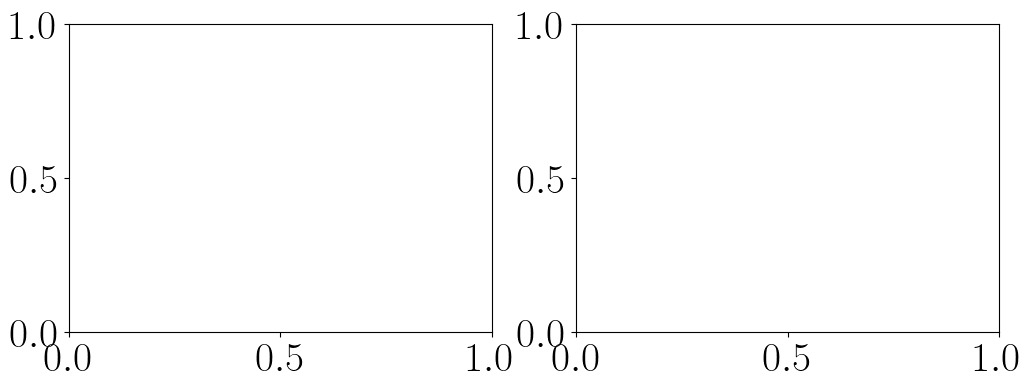

In [7]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

r_array = atom.hnc.r_array

sin_h = h_r_rsin(r_array, 3.5, 1, 4, 0.85, 1, 1)
# rinf_h = h_r_rinf(r_array, 3.5, 1, 4, 0.85)
# r0_βω   = βω_r0(r_array, 44.99967275, -66.20326933,  24.71385205)
# rall_h = h_r_rall(r_array, 3.5, 1, 4, 0.85)

# h(r) Plot
axs[0].plot(r_array, atom.onlyion_hnc.h_r_matrix[0,0],'k-', label="HNC")
axs[0].plot(r_array, sin_h , label='sin')
axs[0].plot(r_array, rinf_h,label=r'$r\to\infty$')
axs[0].plot(r_array, np.exp(-r0_βω)-1,label=r'$r\to0$')
axs[0].plot(r_array, rall_h,label=r'$r_{all}$')

# βω(r) = -ln( h(r)+1 ) Plot

axs[1].plot(r_array, atom.onlyion_hnc.βω_r_matrix[0,0],'k-', label='HNC')
# axs[1].plot(r_array, -np.log(sin_h + 1) , label='sin')
# axs[1].plot(r_array, -np.log(rinf_h + 1),label=r'$r\to\infty$')
axs[1].plot(r_array, r0_βω,label=r'$r\to0$')
# axs[1].plot(r_array, -np.log(rall_h + 1),label=r'$r_{all}$')


#axs[1].plot(r_array, -np.log( h_r_rall(r_array, 3.5, 1, 4, 0.85)   +1), label='')


# ax.plot(r_array, atom.onlyion_hnc.h_r_matrix[0,0])


# ax.plot(r_array, h_r_rall(r_array, 3.5, 1, 4, 0.85, 1, 0.5))
# ax.plot(r_array, -np.log( h_r_rinf(r_array, 3.5, 1, 4, 0.85)   +1))
# ax.plot(r_array, -np.log( h_r_rinf(r_array, 3.5, 1, 4, 0.85)   +1) + 300*np.exp(-5*r_array) )

# ax.plot(r_array, h_r_rinf(r_array, 3.5, 1, 4, 0.85))
# ax.plot(r_array, -np.log(h_r_r0(r_array, 35, 3) )+1)
# ax.plot(r_array, -np.log(h_r_r0(r_array, 300, 5) * h_r_rinf(r_array, 3.5, 1, 4, 0.85) ))

axs[0].set_ylim(-2,2)
axs[0].set_ylabel('h(r)', fontsize=20)
axs[1].set_ylabel(r'$\beta \omega (r)$', fontsize=20)
# axs[1].set_xscale('log')
# axs[1].set_ylim(-10,1e5)

for ax in axs:
    ax.set_xlim(0,5)
    ax.legend(fontsize=12, loc='upper right')
    ax.tick_params(labelsize=14)

axs[0].set_yscale('symlog',linthresh=0.1) 
axs[1].set_yscale('symlog',linthresh=0.1) 
plt.tight_layout()

In [379]:
from scipy.optimize import curve_fit

r0_fit, _ = curve_fit(βω_r0, r_array[:1600], atom.onlyion_hnc.βω_r_matrix[0,0][:1600])
r0_βω   = βω_r0(r_array, *r0_fit )

rinf_fit, _ = curve_fit(h_r_rinf, r_array[2000:], atom.onlyion_hnc.h_r_matrix[0,0][2000:])
rinf_h   = h_r_rinf(r_array, *rinf_fit)

r0_fit, rinf_fit

(array([ 45.00014017, -66.28500582,  22.88263464,   5.4752138 ,
         -3.14198132]),
 array([ 2.94474915,  0.98504215,  3.90559357, -5.24781348]))

In [381]:
rall_fit, _ = curve_fit(h_r_rall, r_array, atom.onlyion_hnc.h_r_matrix[0,0],
                        p0= [3.5, 1, 4, 0.85, 
                             45.00014017, -66.28500582, 22.88263464, 5.4752138 , -3.14198132, 1.3])
rall_h   = h_r_rall(r_array, *rall_fit )

#### Check Fourier Transform

In [ ]:
r0_h_k = atom.onlyion_hnc.FT_r_2_k(r0_h)
rinf_h_k = atom.onlyion_hnc.FT_r_2_k(rinf_h)
rall_h_k = atom.onlyion_hnc.FT_r_2_k(rall_h)

#### Invert to get c_s_k

In [383]:
rall_c_s_k = atom.onlyion_hnc.invert_SVT(np.array([[rall_h_k]]), atom.onlyion_hnc.c_s_k_matrix )
r0_c_s_k = atom.onlyion_hnc.invert_SVT(np.array([[r0_h_k]]), atom.onlyion_hnc.c_s_k_matrix )
rinf_c_s_k = atom.onlyion_hnc.invert_SVT(np.array([[rinf_h_k]]), atom.onlyion_hnc.c_s_k_matrix )

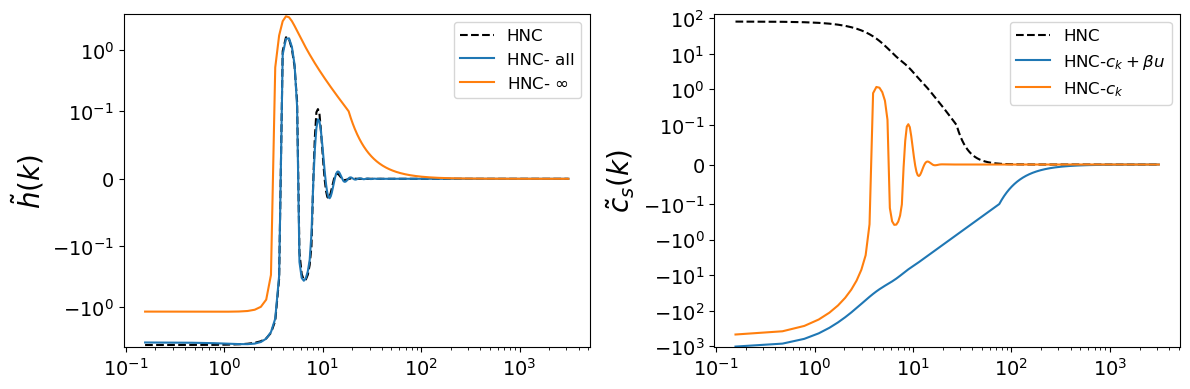

In [399]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

r_array = atom.hnc.r_array
k_array = atom.hnc.k_array

# h(k) Plot
axs[0].plot(k_array, atom.onlyion_hnc.h_k_matrix[0,0],'k--', label="HNC")
axs[0].plot(k_array, rall_h_k, label="HNC- all")
# axs[0].plot(k_array, r0_h_k, label="HNC- 0")
axs[0].plot(k_array, rinf_h_k, label=r"HNC- $\infty$ ")

# c_s(k) Plot
axs[1].plot(k_array, atom.onlyion_hnc.c_s_k_matrix[0,0],'k--', label="HNC")
axs[1].plot(k_array, atom.onlyion_hnc.c_k_matrix[0,0] - atom.onlyion_hnc.βu_k_matrix[0,0], label=r"HNC-$c_k+βu$")
axs[1].plot(k_array, atom.onlyion_hnc.c_k_matrix[0,0], label=r"HNC-$c_k$")
# axs[1].plot(k_array, rall_c_s_k[0,0], label='Fit')
# axs[1].plot(k_array, rall_c_s_k[0,0] - atom.onlyion_hnc.c_s_k_matrix[0,0], label=r"$\Delta$")



# axs[0].set_ylim(-2,2)
axs[0].set_ylabel(r'$\tilde{h}(k)$', fontsize=20)
axs[1].set_ylabel(r'$\tilde{c}_s (k)$', fontsize=20)
# axs[1].set_ylim(-10,1e5)

for ax in axs:
#     ax.set_xlim(0,5)
    ax.legend(fontsize=12, loc='upper right')
    ax.tick_params(labelsize=14)
    ax.set_xscale('log')
    ax.set_yscale('symlog',linthresh=0.1) 
plt.tight_layout()

# Attempt Finding Best Analytic Function Directly


In [396]:
from scipy.optimize import minimize

def min_func(params):
    h_r_guess = rall_h   = h_r_rall(r_array, *params )
    h_k_guess = atom.onlyion_hnc.FT_r_2_k(h_r_guess)
    c_s_k_guess = atom.onlyion_hnc.invert_SVT(np.array([[h_k_guess]]), atom.onlyion_hnc.c_s_k_matrix )
    err = atom.onlyion_hnc.total_err( c_s_k_guess)
    return err

# min_func(rall_fit)
minimize( min_func, rall_fit )




KeyboardInterrupt: 